## Exploratory Data Analysis

#### Roles to explore:

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for Data Analyst Roles in EU

In [8]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

df_DA_EU = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(list_countries))].copy()

In [9]:
df_DA_EU['job_country'].value_counts().head(10) #most popular countries

job_country
France         13803
Germany         7131
Spain           5177
Italy           4543
Netherlands     4123
Portugal        3987
Belgium         3807
Poland          3172
Ireland         2756
Austria         2169
Name: count, dtype: int64

In [10]:
df_DA_EU['company_name'].value_counts().head(5) #most popular companies

company_name
Confidenziale    550
Michael Page     276
BNP Paribas      240
Randstad         227
Peroptyx         208
Name: count, dtype: int64

In [11]:
import seaborn as sns

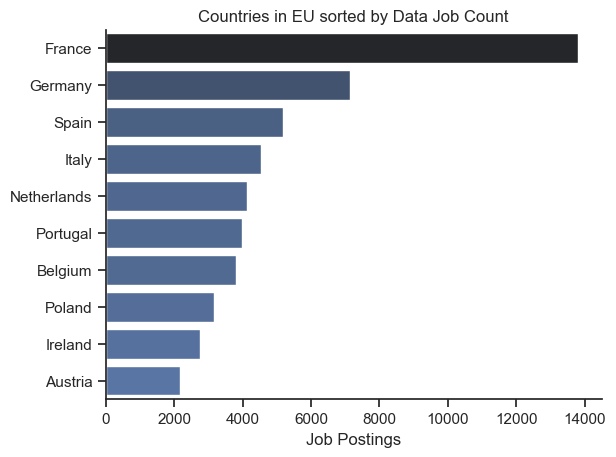

In [16]:
df_plot = df_DA_EU['job_country'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Countries in EU sorted by Data Job Count')
plt.xlabel('Job Postings')
plt.ylabel('')
plt.show()

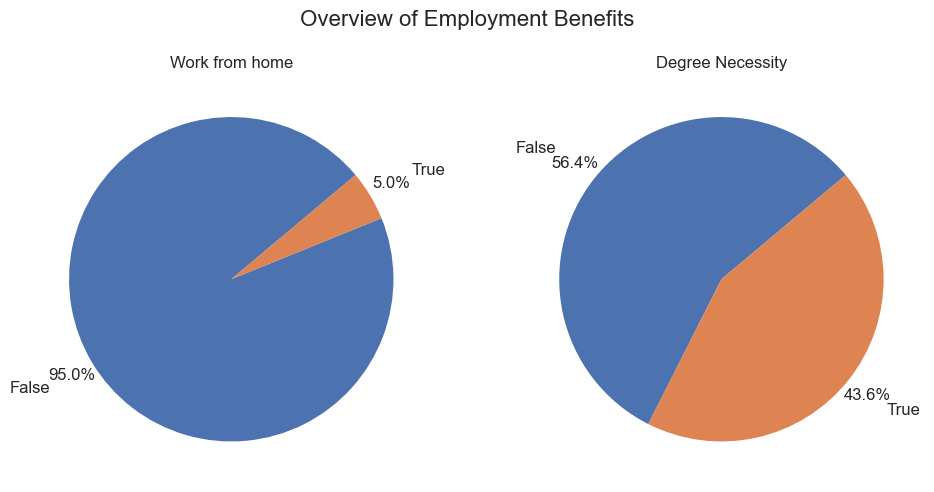

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle('Overview of Employment Benefits', fontsize=16)

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Degree Necessity'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df_DA_EU[column].value_counts(), 
        startangle=40, 
        autopct='%1.1f%%', 
        labels=['False', 'True'], 
        pctdistance=1.15,
        labeldistance=1.3,
        wedgeprops={'edgecolor': 'none'},
        textprops={'fontsize': 12},
        )
    ax[i].set_title(title)

plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

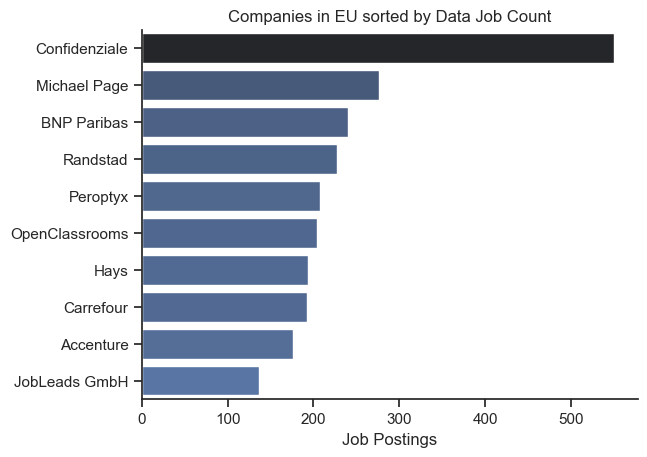

In [50]:
df_plot = df_DA_EU['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Companies in EU sorted by Data Job Count')
plt.xlabel('Job Postings')
plt.ylabel('')
plt.show()

#### The majority of the postings do have the salary information

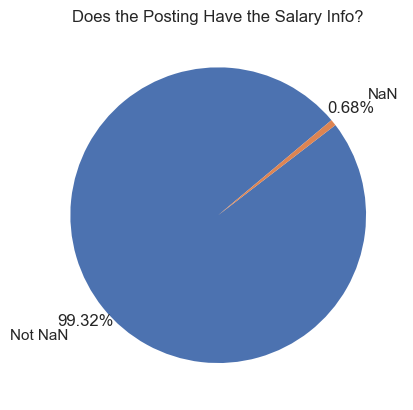

In [55]:
salary_status_counts = df_DA_EU['salary_year_avg'].isna().value_counts()
salary_status_counts.index = ['Not NaN', 'NaN']


salary_status_counts.plot(kind='pie', startangle=40, autopct='%1.2f%%', pctdistance=1.15, labeldistance=1.3, wedgeprops={'edgecolor': 'none'})

plt.title('Does the Posting Have the Salary Info?')
plt.ylabel('')
plt.show()

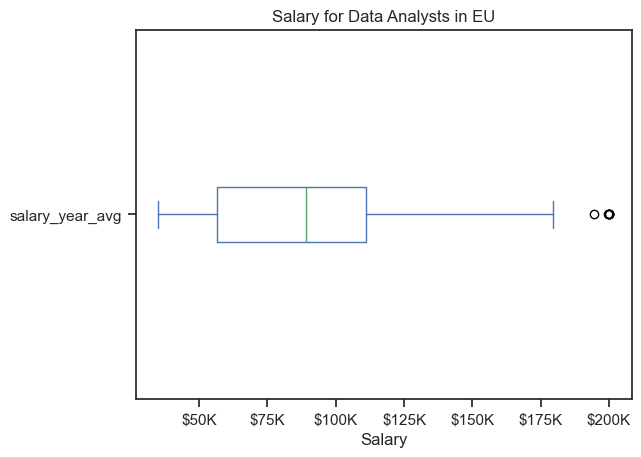

In [61]:
df_DA_EU['salary_year_avg'].plot(kind='box', vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title('Salary for Data Analysts in EU')
plt.xlabel('Salary')
plt.ylabel('')
plt.show()